In [1]:
import pandas as pd
import numpy as np
from numpy.random import Generator, PCG64
from joblib import Parallel, delayed
import altair as alt

rng = Generator(PCG64())
alt.renderers.enable("mimetype")
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
all_df = pd.read_csv("merged_evaluated_responses.csv")
# all_df = pd.read_csv("all_evaluated_responses.csv")
all_df = all_df.dropna(subset=['agent_response'])
all_df['item_id'] = all_df['question'] + all_df['image_file']

In [3]:
all_df[(all_df["test_type"] == "holf2")&(all_df["agent_instruction_type"] == "GPT-5_with_description")]["agent_response"].isna().sum()

np.int64(0)

In [4]:
all_df[all_df["agent_type"] == "GPT-4V"]

instructions description  \
0     The first part of this study consists of 13 mu...         NaN   
1     The first part of this study consists of 13 mu...         NaN   
2     The first part of this study consists of 13 mu...         NaN   
3     The first part of this study consists of 13 mu...         NaN   
4     The first part of this study consists of 13 mu...         NaN   
...                                                 ...         ...   
3365  You will be presented with a series of data vi...         NaN   
3366  You will be presented with a series of data vi...         NaN   
3367  You will be presented with a series of data vi...         NaN   
3375  You will be presented with a series of data vi...         NaN   
3379  You will be presented with a series of data vi...         NaN   

                                               question  \
0     What percentage of patients recovered after ch...   
1     What percentage of patients recovered after ch...   
2     What percentage of patients recovered after ch...   
3     What percentage of patients recovered after ch...   
4     What percentage of patients recovered after ch...   
...                                                 ...   
3365  Imagine that you came across a random west coa...   
3366  Imagine that you came across a random west coa...   
3367  Imagine that you came across a random west coa...   
3375  What is the average speed of aircrafts flying ...   
3379  What is the average speed of aircrafts flying ...   

                                          image_file  \
0                                      ggr_item1.png   
1                                      ggr_item1.png   
2                                      ggr_item1.png   
3                                      ggr_item1.png   
4                                      ggr_item1.png   
...                                              ...   
3365    bar_fatal_4_v2popc_v3region_v4age_v5none.png   
3366    bar_fatal_4_v2popc_v3region_v4age_v5none.png   
3367    bar_fatal_4_v2popc_v3region_v4age_v5none.png   
3375  bar_bird_4_v2heightc_v3sky_v4engine_v5none.png   
3379  bar_bird_4_v2heightc_v3sky_v4engine_v5none.png   

                                                item_id agent_type  \
0     What percentage of patients recovered after ch...     GPT-4V   
1     What percentage of patients recovered after ch...     GPT-4V   
2     What percentage of patients recovered after ch...     GPT-4V   
3     What percentage of patients recovered after ch...     GPT-4V   
4     What percentage of patients recovered after ch...     GPT-4V   
...                                                 ...        ...   
3365  Imagine that you came across a random west coa...     GPT-4V   
3366  Imagine that you came across a random west coa...     GPT-4V   
3367  Imagine that you came across a random west coa...     GPT-4V   
3375  What is the average speed of aircrafts flying ...     GPT-4V   
3379  What is the average speed of aircrafts flying ...     GPT-4V   

     agent_response correct_answer test_type  is_correct instruction_type  \
0              22.0             35       ggr           0            paper   
1              22.0             35       ggr           0            paper   
2              22.0             35       ggr           0            paper   
3              40.0             35       ggr           0            paper   
4              22.0             35       ggr           0            paper   
...             ...            ...       ...         ...              ...   
3365          500.0        738.286     holf2           0            paper   
3366          425.0        738.286     holf2           0            paper   
3367          600.0        738.286     holf2           0            paper   
3375          160.0        127.338     holf2           0            paper   
3379         130.67        127.338     holf2           1            paper   

     agent_instruction_type  
0           

In [5]:
model_configs = [
    {'model': "GPT-4V_paper", 'top_p': 'p06', 'temp': 't1', 'color': '#2e693b', 'accent_color': '#73D287'},
    {'model': "GPT-4o_paper", 'top_p': 'p06', 'temp': 't1', 'color': '#5ba3cf', 'accent_color': '#8cbedd'},
    {'model': "GPT-4o_no_instruction", 'top_p': 'p1', 'temp': 't10', 'color': '#4c78a8', 'accent_color': '#81a0c2'},
    {'model': "GPT-4o_with_description", 'top_p': 'p04', 'temp': 't1', 'color': '#f9b574', 'accent_color': '#facb9d'},
    {'model': "GPT-5_paper", 'top_p': 'p1', 'temp': 't04', 'color': '#f58518', 'accent_color': '#f79d46'},
    {'model': "GPT-5_no_instruction", 'top_p': 'p1', 'temp': 't04', 'color': '#BF9000', 'accent_color': '#F1C232'},
    {'model': "GPT-5_with_description", 'top_p': 'p08', 'temp': 't1', 'color': '#ba94c4', 'accent_color': '#c7b8d9'}
]

In [6]:
# model_configs = [
#     {'model': "GPT-4o_paper", 'top_p': 'p06', 'temp': 't1', 'color': '#5ba3cf', 'accent_color': '#8cbedd'},
#     {'model': "GPT-4o_no_instruction", 'top_p': 'p1', 'temp': 't10', 'color': '#4c78a8', 'accent_color': '#81a0c2'},
#     {'model': "GPT-4o_with_description", 'top_p': 'p04', 'temp': 't1', 'color': '#f9b574', 'accent_color': '#facb9d'},
#     {'model': "GPT-5_paper", 'top_p': 'p1', 'temp': 't04', 'color': '#f58518', 'accent_color': '#f79d46'},
#     {'model': "GPT-5_no_instruction", 'top_p': 'p1', 'temp': 't04', 'color': '#BF9000', 'accent_color': '#F1C232'},
#     {'model': "GPT-5_with_description", 'top_p': 'p08', 'temp': 't1', 'color': '#ba94c4', 'accent_color': '#c7b8d9'}
# ]

### Find Human and Model Performance

In [7]:
def bootstrap_ci(
        data: pd.DataFrame,
        measure: str,
        id_col: str,
        n_iterations=1000,
        statistic=np.mean):
    """Bootstrap confidence interval
    """
    
    items = list(data[id_col].unique())
    n_size = len(items)
    df = data.copy()

    def bootstrap_iteration(data, chosen_items):
        filter_df = pd.concat(
            [data[data['item_id'] == item] for item in chosen_items]
        )
        bs_mean = statistic(filter_df[measure]) 
        return (bs_mean, list(chosen_items))

    qset_means = Parallel(n_jobs=-1)(
        delayed(bootstrap_iteration)(
            df.copy(),
            rng.choice(items, n_size,  replace=True)
        ) for _ in range(n_iterations)
    )
    
    means = []
    qs_used = []
    means = [bs_mean for bs_mean, chosen_qs in qset_means]
 
    # 95% confidence interval
    lower = np.percentile(means, 2.5)
    upper = np.percentile(means, 97.5)
    
    return lower, upper


def create_confidence_interval_df(
    data: pd.DataFrame,
    measure: str, 
    id_col: str,
    condition_col: str,
    statistic=np.mean
):
    data_list = []

    for condition in data[condition_col].unique():
        condition_data = data[data[condition_col] == condition]

        lower, upper = bootstrap_ci(condition_data, measure=measure, statistic=statistic, id_col=id_col)
        mean = statistic(condition_data[measure])

        data_list.append({
            condition_col: condition,
            "ci_upper": upper, 
            "ci_lower": lower,
            "mean": mean
        })

    return pd.DataFrame(data_list)

### Create CI DFs

In [8]:
def create_invalid_included_df():
    item_test_tuples = all_df[['item_id', 'test_type']].drop_duplicates().itertuples(index=False)

    grouped_all_items = []
    for item, test_type in item_test_tuples:
        for agent, agent_group in all_df.groupby(['agent_instruction_type']):
            if item in agent_group['item_id'].unique():
                group = agent_group[agent_group['item_id'] == item]
            else:
                group = pd.DataFrame(
                    {}, 
                    columns=['item_id', 'is_correct', 'agent_instruction_type', 'test_type']
                )
                
            num_invalid_items = len(group) - 5 # check for missing items
            # print("Current agent0", agent[0])
            if agent[0] == "GPT-4V_paper":
                num_invalid_items = len(group) - 10
            
            if num_invalid_items < 0:
                # if missing add N rows marked as incorrect
                invalid_rows_df = pd.DataFrame([{
                    'item_id': item, 
                    'is_correct': 0,
                    'agent_instruction_type': agent[0],
                    'test_type': test_type
                } for _ in range(abs(num_invalid_items))])
    
                complete_group = pd.concat([invalid_rows_df, group])
                grouped_all_items.append(complete_group)
            else:
                grouped_all_items.append(group)
    
    invalid_included_df = pd.concat(grouped_all_items)
    return invalid_included_df

def create_ci_df(all_df, invalid_included_df):
    ci_dfs = []
    
    for test in all_df['test_type'].unique():
        invalid_inclusive_ci_df = create_confidence_interval_df(
            data=invalid_included_df[invalid_included_df['test_type'] == test].copy(),
            measure='is_correct', 
            id_col='item_id',
            condition_col='agent_instruction_type',
        )
        invalid_inclusive_ci_df['test_type'] = test
        invalid_inclusive_ci_df['scoring_type'] = 'all'
    
        valid_ci_df = create_confidence_interval_df(
            data=all_df[all_df['test_type'] == test].copy(),
            measure='is_correct', 
            id_col='item_id',
            condition_col='agent_instruction_type',
            statistic=np.mean
        )
        valid_ci_df['test_type'] = test
        valid_ci_df['scoring_type'] = 'valid_only'
    
        ci_dfs.append(invalid_inclusive_ci_df)
        ci_dfs.append(valid_ci_df)
    
    ci_dfs = pd.concat(ci_dfs)
    
    return ci_dfs

try:
    ci_dfs = pd.read_csv("./new_dataframes/performance_ci_df.csv")
    invalid_included_df = pd.read_csv("./new_dataframes/invalid_included_df.csv")
except:
    invalid_included_df = create_invalid_included_df()
    ci_dfs = create_ci_df(all_df, invalid_included_df)
    ci_dfs.to_csv("./new_dataframes/performance_ci_df.csv")
    invalid_included_df.to_csv("./new_dataframes/invalid_included_df.csv")

In [9]:
# ci_dfs

In [10]:
def find_ci_str(r):
    upper = round(r['ci_upper'], 2)
    lower = round(r['ci_lower'], 2)
    corr = round(r['mean'], 2)

    return "/ci{" + str(corr) + "}{" + str(lower) + "}{" + str(upper) + "}"
    
ci_dfs['ci_str'] = ci_dfs.apply(find_ci_str, axis=1)

In [11]:
# ci_dfs

In [12]:
invalid_included_df.groupby('agent_instruction_type').size()

agent_instruction_type
GPT-4V_paper               1070
GPT-4o_no_instruction       535
GPT-4o_paper                535
GPT-4o_with_description     535
GPT-5_no_instruction        535
GPT-5_paper                 535
GPT-5_with_description      535
dtype: int64

In [13]:
all_df.groupby('agent_instruction_type').size()

agent_instruction_type
GPT-4V_paper               601
GPT-4o_no_instruction      534
GPT-4o_paper               533
GPT-4o_with_description    530
GPT-5_no_instruction       534
GPT-5_paper                533
GPT-5_with_description     516
dtype: int64

### Create CI Plot

In [116]:
def create_error_plot(ci_df, test_name):
    """ Creates a scatter plot with error bars for accuracy data.

    Args:
        test: name of the test
    """
    model_order = [c['model'] for c in model_configs]
    main_color_order = [c['color'] for c in model_configs]
    bg_color_order = [c['accent_color'] for c in model_configs]

    ytitle = ''
    y_domain = [0, 1]
    opacity = 1
  

    error_bars = alt.Chart(ci_df).mark_errorbar().encode(
        x=alt.X("agent_instruction_type:N"),
        y=alt.Y("ci_upper", title=ytitle),
        y2=alt.Y2("ci_lower"),
        xOffset="scoring_type:N",
        strokeWidth=alt.value(2),
        color=alt.Color('agent_instruction_type', scale=alt.Scale(domain=model_order, range=main_color_order)).legend(None)
    )


    mean_point_plot_filled = alt.Chart(
        ci_df, 
        title=test_name
    ).mark_point(
        size=40, 
        filled=True,
        strokeWidth=1,
        opacity=1
    ).encode(
        y=alt.Y("mean:Q", scale=alt.Scale(domain=[0, 1])),
        x=alt.X("agent_instruction_type:N", scale=alt.Scale(domain=model_order), title=None),
        xOffset="scoring_type:N",
        stroke=alt.Stroke(
            'agent_instruction_type:N', 
            scale=alt.Scale(
                domain=model_order, 
                range=main_color_order
            )
        ).legend(None),
        color=alt.condition(
            alt.datum['scoring_type'] == 'all',
            alt.value('white'),  # Use white color if group_includes is 'all'
            alt.Color(
                'agent_instruction_type:N', 
                scale=alt.Scale(
                    domain=model_order, 
                    range=main_color_order
                )
            )
        ).legend(None),
    )
    
    mean_slope_plot = alt.Chart(ci_df, title=test_name).mark_line(
        strokeWidth=2,
        opacity=0.6
    ).encode(
        y=alt.Y("mean:Q",scale=alt.Scale(domain=[0, 1])),
        x=alt.X("agent_instruction_type:N", scale=alt.Scale(domain=model_order), title=None),
        xOffset="scoring_type:N",
        # detail='scoring_type',
        color=alt.Color(
            'agent_instruction_type:N', 
            scale=alt.Scale(
                domain=model_order, 
                range=main_color_order
            )
        ).legend(None),
    )

    
    legend_for_fill = alt.Chart(ci_df).mark_point(
        size=60,
        filled=True,
        stroke='grey',
        strokeWidth=1
    ).encode(
        fill=alt.Fill(
            'scoring_type:N',
            scale=alt.Scale(
                domain=['all', 'valid_only'],
                range=['white', 'grey']
            ),
            legend=alt.Legend(
                title=None,
                labelExpr="datum.label == 'all' ? 'invalid included' : 'valid only'",
                symbolStrokeColor='grey',
                symbolSize=100,
                labelFontSize=12,   
                orient='none',
                legendX=850,
                legendY=5
            )
        ),
        opacity=alt.value(0),
        x=alt.value(0),
        y=alt.value(0)
    )
    

    final_plot = error_bars + mean_slope_plot + mean_point_plot_filled + legend_for_fill # + mean_point_plot_filled 
    
    return final_plot.resolve_scale(color="independent",  opacity="independent")

In [ ]:
def create_error_plot(ci_df, test_name):
    model_order = [c['model'] for c in model_configs]
    main_color_order = [c['color'] for c in model_configs]

    display_order = [name_map.get(m, m) for m in model_order]

    error_bars = alt.Chart(ci_df).mark_errorbar().encode(
        x=alt.X("display_name:N", scale=alt.Scale(domain=display_order), title=None),
        y=alt.Y("ci_upper", title=y_title,axis=alt.Axis(titleFontSize=14, labelFontSize=13)),
        y2=alt.Y2("ci_lower"),
        xOffset="scoring_type:N",
        strokeWidth=alt.value(2),
        color=alt.Color('display_name:N',
                        scale=alt.Scale(domain=display_order, range=main_color_order),
                        legend=None)
    )

    mean_point_plot_filled = alt.Chart(ci_df, title=test_name).mark_point(
        size=40, filled=True, strokeWidth=1, opacity=1
    ).encode(
        y=alt.Y("mean:Q", title=y_title, scale=alt.Scale(domain=[0, 1]),axis=alt.Axis(titleFontSize=14, labelFontSize=13)),
        x=alt.X("display_name:N", scale=alt.Scale(domain=display_order), title=None),
        xOffset="scoring_type:N",
        stroke=alt.Stroke('display_name:N',
                          scale=alt.Scale(domain=display_order, range=main_color_order),
                          legend=None),
        color=alt.condition(
            alt.datum['scoring_type'] == 'all',
            alt.value('white'),
            alt.Color('display_name:N',
                      scale=alt.Scale(domain=display_order, range=main_color_order),
                      legend=None)
        )
    )

    mean_slope_plot = alt.Chart(ci_df, title=test_name).mark_line(
        strokeWidth=2, opacity=0.6
    ).encode(
        y=alt.Y("mean:Q", title=y_title, scale=alt.Scale(domain=[0, 1]),axis=alt.Axis(titleFontSize=14, labelFontSize=13)),
        x=alt.X("display_name:N", scale=alt.Scale(domain=display_order), title=None, axis=alt.Axis(labelFontSize=13,labelLimit=0)),
        xOffset="scoring_type:N",
        color=alt.Color('display_name:N',
                        scale=alt.Scale(domain=display_order, range=main_color_order),
                        legend=None)
    )

    legend_for_fill = alt.Chart(ci_df).mark_point(size=60, filled=True, stroke='grey', strokeWidth=1).encode(
        fill=alt.Fill('scoring_type:N',
                      scale=alt.Scale(domain=['all', 'valid_only'], range=['white', 'grey']),
                      legend=alt.Legend(title=None,
                                        labelExpr="datum.label == 'all' ? 'invalid included' : 'valid only'",
                                        symbolStrokeColor='grey', symbolSize=100,
                                        labelFontSize=12, orient='none', legendX=850, legendY=5)),
        opacity=alt.value(0), x=alt.value(0), y=alt.value(0)
    )

    final_plot = error_bars + mean_slope_plot + mean_point_plot_filled + legend_for_fill
    return final_plot.resolve_scale(color="independent", opacity="independent")

In [22]:
# ci_dfs[ci_dfs['scoring_type'] == 'valid_only'].sort_values(
#     by=['test_type', 'mean']
# )

In [23]:
ci_dfs

Unnamed: 0   agent_instruction_type  ci_upper  ci_lower      mean  \
0            0             GPT-4V_paper  0.281818  0.072727  0.172727   
1            1    GPT-4o_no_instruction  0.836364  0.309091  0.581818   
2            2             GPT-4o_paper  0.818182  0.272727  0.545455   
3            3  GPT-4o_with_description  0.709091  0.163636  0.436364   
4            4     GPT-5_no_instruction  0.981818  0.636364  0.836364   
..         ...                      ...       ...       ...       ...   
65           2     GPT-5_no_instruction  0.426667  0.146667  0.280000   
66           3   GPT-5_with_description  0.386667  0.106667  0.240000   
67           4             GPT-4o_paper  0.020000  0.000000  0.006667   
68           5    GPT-4o_no_instruction  0.053333  0.000000  0.020000   
69           6  GPT-4o_with_description  0.000000  0.000000  0.000000   

   test_type scoring_type                 ci_str  
0        ggr          all  /ci{0.17}{0.07}{0.28}  
1        ggr          all  /ci{0.58}{0.31}{0.84}  
2        ggr          all  /ci{0.55}{0.27}{0.82}  
3        ggr          all  /ci{0.44}{0.16}{0.71}  
4        ggr          all  /ci{0.84}{0.64}{0.98}  
..       ...          ...                    ...  
65     holf2   valid_only  /ci{0.28}{0.15}{0.43}  
66     holf2   valid_only  /ci{0.24}{0.11}{0.39}  
67     holf2   valid_only   /ci{0.01}{0.0}{0.02}  
68     holf2   valid_only   /ci{0.02}{0.0}{0.05}  
69     holf2   valid_only     /ci{0.0}{0.0}{0.0}  

[70 rows x 8 columns]

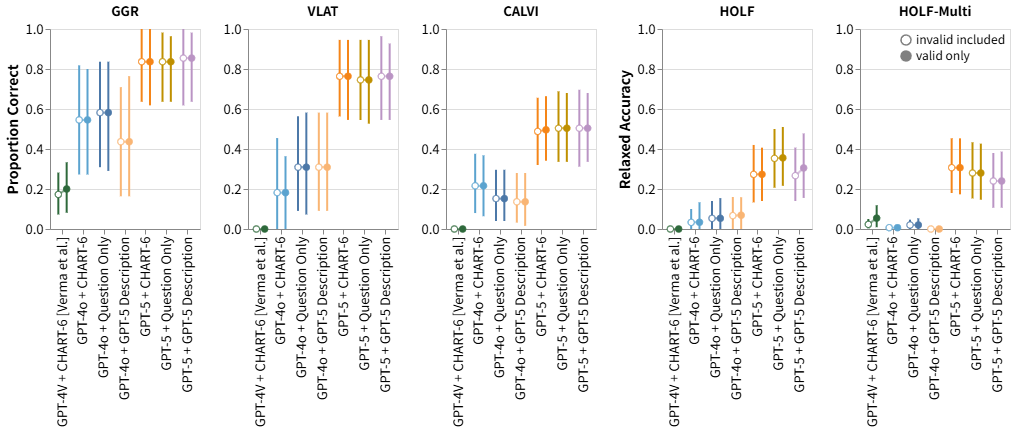

In [ ]:
ci_df = ci_dfs[
    ((ci_dfs['scoring_type'] == 'valid_only') &
    (ci_dfs['agent_instruction_type'] == 'Human')) |
    (ci_dfs['agent_instruction_type'] != 'Human')
]


tests = ['ggr', 'vlat', 'calvi', 'holf', 'holf2']


titles = {
    "ggr": "GGR",
    "vlat": "VLAT",
    "calvi": "CALVI",
    "holf": "HOLF",
    "holf2": "HOLF-Multi"
}

name_map = {
    "GPT-4o_paper": "GPT-4o + CHART-6",
    "GPT-4o_with_description": "GPT-4o + GPT-5 Description",
    "GPT-4o_no_instruction": "GPT-4o + Question Only",
    "GPT-5_paper": "GPT-5 + CHART-6",
    "GPT-5_with_description": "GPT-5 + GPT-5 Description",
    "GPT-5_no_instruction": "GPT-5 + Question Only",
    "GPT-4V_paper": "GPT-4V + CHART-6 [Verma et al.]"
}

ci_df = ci_df.copy()
ci_df["display_name"] = ci_df["agent_instruction_type"].map(name_map)


plots = []
for test in tests:
    test_ci_df = ci_df[ci_df['test_type'] == test]
    if len(test) > 6:
        test = test[:7]
    label = titles.get(test, test)

    if label == "GGR":
        y_title = "Proportion Correct"
    elif label == "HOLF":
        y_title = "Relaxed Accuracy"
    else:
        y_title = None

    
    plot = create_error_plot(test_ci_df, test)
    plot = plot.properties(width=150, height=200, title=label)
    plots.append(plot)

plots = alt.hconcat(*plots)
# plots.savefig("CI_graph")
plots

## Check regression values

### Load R

In [14]:
%load_ext rpy2.ipython

In [15]:
%%R
install.packages("lme4")
library(lme4)

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 1) [https]
16: China (Beijing 2) [https]
17: China (Beijing 3) [https]
18: China (Hefei) [https]
19: China (Hong Kong) [https]
20: China (Jinan) [https]
21: China (Lanzhou) [https]
22: China (Nanjing) [https]
23: China (Shanghai 2) [https]
24: China (Shenzhen) [https]
25: China (Wuhan) [https]
26: Colombia (Cali) [https]
27: Costa Rica [https]
28: Cyprus [https]
29: Czech Republic [https]
30: Denmark [https]
31: East Asia [https]
32: Ecuador (Cuenca) [https]
33: Finland (Helsinki) [https]
34: France (Lyon 1

Selection:  68



The downloaded binary packages are in
	/var/folders/v8/3zpbxkws53b3x6m8509jyml80000gn/T//RtmpDFrXAh/downloaded_packages


trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/lme4_1.1-37.tgz'
Content type 'application/x-gzip' length 7092567 bytes (6.8 MB)
downloaded 6.8 MB

Loading required package: Matrix
In addition: Warning message:
In doTryCatch(return(expr), name, parentenv, handler) :
  unable to load shared object '/Library/Frameworks/R.framework/Resources/modules//R_X11.so':
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <34C5A480-1AC4-30DF-83C9-30A913FC042E> /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/lib/libSM.6.dylib' (no such file), '/usr/local/lib/libSM.6.dylib' (no such file), '/usr/lib/libSM.6.dylib' (no such file, not in dyld cache)


### Regression Model

In [ ]:
model_only_df = all_df[all_df['agent_type'] != 'Human']

In [ ]:
%%R -i model_only_df

control <- glmerControl(
    optimizer = "bobyqa",
    optCtrl = list(maxfun = 2e5)
)

null_model <- glmer(
    is_correct ~ 1 + (1 | item_id), 
    data = model_only_df, 
    family = binomial, 
    control = control
)

### Do models reliably differ in overall performance from one another?

In [ ]:
print("Num unique models: ", model_only_df['agent_type'].nunique())

In [ ]:
%%R -i model_only_df

agent_model <- glmer(
    is_correct ~ agent_type + (1 | item_id), 
    data = model_only_df, 
    family = binomial,
    control = control
)

anova(null_model, agent_model, test="LRT")

### Model / Human performance gap across assessment

In [20]:
best_performing_models = ci_df[
    (ci_df['scoring_type'] == 'valid_only') &
    (ci_df['agent_type'] != 'Human')
]
best_performing_models = best_performing_models.sort_values(by=['test_type', 'mean',]).groupby('test_type').last().reset_index()
best_performing_models

test_type  Unnamed: 0                      agent_type  \
0                          calvi           5  google/pix2struct-chartqa-base   
1  chartqa-test-continuous-human           7                          GPT-4V   
2                            ggr           7                          GPT-4V   
3                           holf           7                          GPT-4V   
4                          holf2           7                          GPT-4V   
5                           vlat           7                          GPT-4V   

   ci_upper  ci_lower      mean scoring_type                 ci_str  
0  0.563182  0.197515  0.380435   valid_only   \ci{0.38}{0.2}{0.56}  
1  0.853166  0.713057  0.787234   valid_only  \ci{0.79}{0.71}{0.85}  
2  0.380149  0.000000  0.151786   valid_only   \ci{0.15}{0.0}{0.38}  
3  0.216513  0.144169  0.180718   valid_only  \ci{0.18}{0.14}{0.22}  
4  0.170089  0.071954  0.119119   valid_only  \ci{0.12}{0.07}{0.17}  
5  0.736031  0.483981  0.615686   valid_only  \ci{0.62}{0.48}{0.74}

In [21]:
best_performing_models = ci_df[
    (ci_df['scoring_type'] == 'all') &
    (ci_df['agent_type'] != 'Human')
]
best_performing_models = best_performing_models.sort_values(by=['test_type', 'mean',]).groupby('test_type').last().reset_index()

def find_ci_str(r):
    upper = round(r['ci_upper'], 2)
    lower = round(r['ci_lower'], 2)
    corr = round(r['mean'], 2)

    return "\ci{" + str(corr) + "}{" + str(lower) + "}{" + str(upper) + "}"
    
best_performing_models['ci_str'] = best_performing_models.apply(find_ci_str, axis=1)

best_performing_models

test_type  Unnamed: 0 agent_type  ci_upper  ci_lower  \
0                          calvi           0     GPT-4V  0.331750  0.153292   
1  chartqa-test-continuous-human           0     GPT-4V  0.666400  0.518380   
2                            ggr           0     GPT-4V  0.315385  0.000000   
3                           holf           0     GPT-4V  0.134121  0.084622   
4                          holf2           0     GPT-4V  0.083333  0.031944   
5                           vlat           0     GPT-4V  0.715142  0.481132   

       mean scoring_type                 ci_str  
0  0.238333          all  \ci{0.24}{0.15}{0.33}  
1  0.592000          all  \ci{0.59}{0.52}{0.67}  
2  0.130769          all   \ci{0.13}{0.0}{0.32}  
3  0.108854          all  \ci{0.11}{0.08}{0.13}  
4  0.055093          all  \ci{0.06}{0.03}{0.08}  
5  0.592453          all  \ci{0.59}{0.48}{0.72}

In [22]:
best_model_human_df = []
best_performing_models_dict = best_performing_models[['agent_type', 'test_type']].to_dict(orient='records')
for record in best_performing_models_dict:
    agent_type = record['agent_type']
    test_type = record['test_type']
    
    best_model_human_df.append(model_only_df[
        (model_only_df['agent_type'] == agent_type) &
        (model_only_df['test_type'] == test_type)
    ])

best_model_human_df = pd.concat(best_model_human_df)
best_model_human_df = best_model_human_df.groupby(['item_id', 'test_type'])['is_correct'].mean().reset_index()
best_model_human_df['agent_type'] = 'best_model'

human_only_df =  all_df[all_df['agent_type'] == 'Human'].copy()
human_only_df = human_only_df.groupby(['item_id', 'test_type'])['is_correct'].mean().reset_index()
human_only_df['agent_type'] = 'Human'

best_model_human_df = pd.concat([best_model_human_df, human_only_df])

In [23]:
# best_model_human_df


In [24]:
# %%R -i best_model_human_df

# null_model <- lmer(
#     is_correct ~ 1 + agent_type + (1 | item_id), 
#     data = best_model_human_df, 
#     family = binomial, 
#     control = control
# )

# agent_model <- lmer(
#     is_correct ~ 1 + agent_type + (1 | item_id), 
#     data = best_model_human_df, 
#     family = binomial, 
#     control = control
# )

In [25]:
# %%R -i best_model_human_df

# control <- glmerControl(
#     optimizer = "bobyqa",
#     optCtrl = list(maxfun = 2e5)
# )

# null_model <- lmer(
#     is_correct ~ 1 + (1 | item_id), 
#     data = model_only_df, 
#     family = binomial, 
#     control = control
# )

# agent_model <- lmer(

# )

In [26]:
# human_model_correlation_df

In [27]:
# %%R -i human_model_correlation_df

# base_model <- lmer(
#     correlation ~ 1 + (1 | item_id) , 
#     data = human_model_correlation_df,
# )

# interaction_model <- lmer(
#     correlation ~ 1 + model * test + , 
#     data = human_model_correlation_df, 
# )

# anova(base_model, interaction_model, test="LRT")
# anova(null_model, agent_model, test="LRT")

In [28]:
# all_df['item_id']

### Is human-model gap was smaller for misleading items in CALVI?

In [29]:
calvi_human_gpt_df = all_df[
    (all_df['agent_type'].isin(['Human', 'GPT-4V']))
    & (all_df['test_type'] == 'calvi')
].copy()
calvi_human_gpt_df['misleading_type'] = calvi_human_gpt_df['image_file'].apply(lambda f : f[0])

In [30]:
%%R -i calvi_human_gpt_df

null_model <- glmer(
    is_correct ~ 1 + (1 | item_id), 
    data = calvi_human_gpt_df, 
    family = binomial, 
    control = control
)

agent_model <- glmer(
    is_correct ~ misleading_type + (1 | item_id), 
    data = calvi_human_gpt_df, 
    family = binomial,
    control = control
)

anova(null_model, agent_model, test="LRT")

Data: calvi_human_gpt_df
Models:
null_model: is_correct ~ 1 + (1 | item_id)
agent_model: is_correct ~ misleading_type + (1 | item_id)
            npar   AIC   BIC  logLik -2*log(L)  Chisq Df Pr(>Chisq)    
null_model     2 13183 13198 -6589.4     13179                         
agent_model    3 13161 13184 -6577.4     13155 23.971  1  9.779e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Difference of means

In [31]:
def bootstrap_diff_of_mean_ci(
        data: pd.DataFrame,
        measure,
        id_col,
        group1: str,
        group2: str,
        group_col='agent_type',
        n_iterations=1000,
        statistic=np.mean,
    ):
    
    items = list(data[data[group_col] == group1][id_col].unique())
    n_size = len(items)
    df = data.copy()

    def bootstrap_iteration(data, chosen_items):
        filter_df = pd.concat(
            [data[data[id_col].isin([item])] for item in chosen_items]
        )
        
        bs_mean = statistic(filter_df[measure]) 
        return (bs_mean, list(chosen_items))

    
    qset_means1 = Parallel(n_jobs=-1)(
        delayed(bootstrap_iteration)(
            df[df[group_col] == group1].copy(),
            rng.choice(items, n_size,  replace=True)
        ) for _ in range(n_iterations)
    )

    qset_means2 = Parallel(n_jobs=-1)(
        delayed(bootstrap_iteration)(
            df[df[group_col] == group2].copy(),
            rng.choice(items, n_size,  replace=True)
        ) for _ in range(n_iterations)
    )
    
    means = []
    qs_used = []
    means1 = [bs_mean for bs_mean, chosen_qs in qset_means1]
    means2 = [bs_mean for bs_mean, chosen_qs in qset_means2]
    means = np.subtract(means1, means2)
 
    # 95% confidence interval
    lower = np.percentile(means, 2.5)
    upper = np.percentile(means, 97.5)
    
    return lower, upper

def create_diff_of_mean_ci_df(
    data: pd.DataFrame,
    measure,
    id_col,
    group1,
    group2,
    group_col='agent_type',
    statistic=np.mean
):
    """ create the dataframe for 95% bootstrapped confidence interval
    data: dataset
    measure: dependent variable
    id_col: units to bootstrap along (e.g. participant_d or item_id)
    condition_col: the different conditions of the experiments
    """
    
    data_list = []
    lower, upper = bootstrap_diff_of_mean_ci(
        data,
        group1=group1,
        group2=group2,
        measure=measure, 
        statistic=statistic,
        group_col=group_col,
        id_col=id_col)
    
    mean1 = data[data[group_col] == group1][measure].mean()
    mean2 = data[data[group_col] == group2][measure].mean()
    mean = mean1 - mean2
    
    data_list.append({
        "mean": mean,
        "ci_upper": upper, 
        "ci_lower": lower,
    })

    return pd.DataFrame(data_list)

### Difference of means between Valid vs invalid

In [32]:
# model_invalid_inclded

In [33]:
model_valid_only = all_df[all_df['agent_type'] != 'Human'].copy()
model_valid_only['response_type'] = 'valid_only'
model_invalid_inclded = invalid_included_df[invalid_included_df['agent_type'] != 'Human'].copy()
model_invalid_inclded['response_type'] = 'invalid_included'
model_response_type_df = pd.concat([model_invalid_inclded, model_valid_only])
model_response_type_df['test_type'] = model_response_type_df['test_type'].apply(
    lambda t : 'mc' if t in ['ggr', 'vlat', 'calvi'] else 'num'
)

In [34]:
## multiple choice items
model_response_type_mc_df = create_diff_of_mean_ci_df(
    model_response_type_df[model_response_type_df['test_type'] == 'mc'],
    measure='is_correct',
    id_col='item_id',
    group1='valid_only',
    group2='invalid_included',
    group_col='response_type',
)
model_response_type_mc_df

mean  ci_upper  ci_lower
0  0.121989  0.177403   0.06412

In [35]:
## numerical items
model_response_type_num_df = create_diff_of_mean_ci_df(
    model_response_type_df[model_response_type_df['test_type'] == 'num'],
    measure='is_correct',
    id_col='item_id',
    group1='valid_only',
    group2='invalid_included',
    group_col='response_type',
)
model_response_type_num_df

mean  ci_upper  ci_lower
0  0.040537  0.057765  0.024412

### Difference of means between GPT-4V and other models

In [36]:
gpt_vs_model_df = all_df[all_df['agent_type'] != 'Human'].copy()
gpt_vs_model_df['agent_type'] = gpt_vs_model_df['agent_type'].apply(
    lambda a : "model" if a != 'GPT-4V' else 'GPT-4V'
)
gpt_vs_model_df['test_type'] = gpt_vs_model_df['test_type'].apply(
    lambda t : 'mc' if t in ['ggr', 'vlat', 'calvi'] else 'num'
)

In [37]:
## multiple choice items
gpt_model_mc_df = create_diff_of_mean_ci_df(
    gpt_vs_model_df[gpt_vs_model_df['test_type'] == 'mc'],
    measure='is_correct',
    id_col='item_id',
    group1='GPT-4V',
    group2='model'
)
gpt_model_mc_df

mean  ci_upper  ci_lower
0  0.143466  0.244344   0.04567

In [38]:
## numerical response items
gpt_model_num_df = create_diff_of_mean_ci_df(
    gpt_vs_model_df[gpt_vs_model_df['test_type'] == 'num'],
    measure='is_correct',
    id_col='item_id',
    group1='GPT-4V',
    group2='model'
)
gpt_model_num_df

mean  ci_upper  ci_lower
0  0.218168   0.24841  0.172371

### Difference of means between Humans and GPT-4V

In [39]:
# all_df

In [40]:
human_vs_model_df = all_df[all_df['agent_type'].isin(['GPT-4V', 'Human'])].copy()
human_vs_model_df['test_type'] = human_vs_model_df['test_type'].apply(
    lambda t : 'mc' if t in ['ggr', 'vlat', 'calvi'] else 'num'
)

In [41]:
## multiple choice items
human_model_mc_df = create_diff_of_mean_ci_df(
    human_vs_model_df[human_vs_model_df['test_type'] == 'mc'],
    measure='is_correct',
    id_col='item_id',
    group1='GPT-4V',
    group2='Human'
)
human_model_mc_df

mean  ci_upper  ci_lower
0 -0.256266 -0.163888  -0.36547

In [42]:
## numerical response items
human_model_num_df = create_diff_of_mean_ci_df(
    human_vs_model_df[human_vs_model_df['test_type'] == 'num'],
    measure='is_correct',
    id_col='item_id',
    group1='GPT-4V',
    group2='Human'
)
human_model_num_df

mean  ci_upper  ci_lower
0  0.001627   0.01618 -0.081052

### Difference of means between best performing mode and humans

In [43]:
all_df['test_type'].unique()

array(['ggr', 'vlat', 'calvi', 'holf', 'holf2',
       'chartqa-test-continuous-human'], dtype=object)

In [44]:
all_df['agent_type'].unique()

array(['Salesforce/blip2-flan-t5-xl', 'Salesforce/blip2-flan-t5-xxl',
       'llava-hf/llava-1.5-7b-hf', 'llava-hf/llava-1.5-13b-hf',
       'liuhaotian/llava-v1.6-34b', 'google/pix2struct-chartqa-base',
       'google/matcha-chartqa', 'GPT-4V', 'Human'], dtype=object)

In [50]:
invalid_incuded_df = pd.read_csv("https://data-visualization-benchmark.s3.us-west-2.amazonaws.com/final-data/all_evaluated_responses_df.csv")
invalid_incuded_df['agent_response'] = invalid_incuded_df['agent_response'].fillna(0)
invalid_incuded_df['item_id'] = invalid_incuded_df['question'] + invalid_incuded_df['image_file']

valid_only_df = pd.read_csv("https://data-visualization-benchmark.s3.us-west-2.amazonaws.com/final-data/all_evaluated_responses_df.csv").dropna(subset=['agent_response'])
valid_only_df['item_id'] = valid_only_df['question'] + invalid_incuded_df['image_file']

# all_df['item_id'] = all_df['question'] + all_df['image_file']

In [51]:
def best_model_for_test(all_df, test_type):
    best_model = all_df[
        (all_df['test_type'] == test_type) &
        (all_df['agent_type'] != 'Human')
    ].groupby('agent_type')['is_correct'].mean().sort_values().reset_index()
    
    best_model = best_model.iloc[-1]['agent_type']
    print(f"Best {test_type} model: ", best_model)

    human_vs_model_df = all_df[
        (all_df['agent_type'].isin([best_model, 'Human'])) &
        (all_df['test_type'] == test_type)
    ].copy()
    
    return best_model, human_vs_model_df

In [52]:
def find_ci_str(r):
    upper = round(r.iloc[0]['ci_upper'], 2)
    lower = round(r.iloc[0]['ci_lower'], 2)
    mean = round(r.iloc[0]['mean'], 2)
    r['ci_str'] = "\ci{" + str(mean) + "}{" + str(lower) + "}{" + str(upper) + "}"
    return r

#### Best GGR model

Valid only df

In [53]:
best_ggr_model, human_vs_model_df_ggr = best_model_for_test(valid_only_df, 'ggr')

ggr_valid_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_ggr,
    measure='is_correct',
    id_col='item_id',
    group1=best_ggr_model,
    group2='Human'
)

find_ci_str(ggr_valid_diff)

Best ggr model:  GPT-4V


mean  ci_upper  ci_lower                    ci_str
0 -0.562198 -0.306431 -0.771012  \ci{-0.56}{-0.77}{-0.31}

invalid included df

In [54]:
best_ggr_model, human_vs_model_df_ggr = best_model_for_test(invalid_incuded_df, 'ggr')

ggr_all_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_ggr,
    measure='is_correct',
    id_col='item_id',
    group1=best_ggr_model,
    group2='Human'
)

find_ci_str(ggr_all_diff)

Best ggr model:  GPT-4V


mean  ci_upper  ci_lower                    ci_str
0 -0.580358 -0.361106 -0.764319  \ci{-0.58}{-0.76}{-0.36}

#### Best VLAT model

In [55]:
best_vlat_model, human_vs_model_df_vlat = best_model_for_test(valid_only_df, 'vlat')

vlat_valid_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_vlat,
    measure='is_correct',
    id_col='item_id',
    group1=best_vlat_model,
    group2='Human'
)

find_ci_str(vlat_valid_diff)

Best vlat model:  GPT-4V


mean  ci_upper  ci_lower                   ci_str
0 -0.1228  0.014256 -0.268192  \ci{-0.12}{-0.27}{0.01}

In [56]:
best_vlat_model, human_vs_model_df_vlat = best_model_for_test(invalid_incuded_df, 'vlat')

vlat_all_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_vlat,
    measure='is_correct',
    id_col='item_id',
    group1=best_vlat_model,
    group2='Human'
    
)

find_ci_str(vlat_all_diff)

Best vlat model:  GPT-4V


mean  ci_upper  ci_lower                   ci_str
0 -0.120339  0.009613  -0.25467  \ci{-0.12}{-0.25}{0.01}

#### Best CALVI model

In [57]:
best_calvi_model, human_vs_model_df_calvi = best_model_for_test(valid_only_df, 'calvi')

calvi_valid_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_calvi,
    measure='is_correct',
    id_col='item_id',
    group1=best_calvi_model,
    group2='Human'
)

find_ci_str(calvi_valid_diff)

Best calvi model:  google/pix2struct-chartqa-base


mean  ci_upper  ci_lower                   ci_str
0 -0.230182  0.053048 -0.412175  \ci{-0.23}{-0.41}{0.05}

In [58]:
best_calvi_model, human_vs_model_df_calvi = best_model_for_test(invalid_incuded_df, 'calvi')

calvi_all_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_calvi,
    measure='is_correct',
    id_col='item_id',
    group1=best_calvi_model,
    group2='Human'
)

find_ci_str(calvi_all_diff)

Best calvi model:  GPT-4V


mean  ci_upper  ci_lower                    ci_str
0 -0.372108 -0.235364 -0.494241  \ci{-0.37}{-0.49}{-0.24}

#### Calvi Trick

In [59]:
calvi_model_human_feature_df = all_df[
    (all_df['test_type'] == 'calvi') &
    (all_df['agent_type'].isin([best_calvi_model, 'Human']))
].copy()
calvi_model_human_feature_df['misleading_type'] = calvi_model_human_feature_df['image_file'].apply(lambda f : f[0])

trick vs non-trick questions

In [60]:
human_model_num_df = create_diff_of_mean_ci_df(
    calvi_model_human_feature_df[calvi_model_human_feature_df['misleading_type'] == 'T'],
    measure='is_correct',
    id_col='item_id',
    group1=best_calvi_model,
    group2='Human'
)
human_model_num_df

mean  ci_upper  ci_lower
0 -0.076499  0.081887 -0.265063

In [ ]:
human_model_num_df = create_diff_of_mean_ci_df(
    calvi_model_human_feature_df[calvi_model_human_feature_df['misleading_type'] == 'N'],
    measure='is_correct',
    id_col='item_id',
    group1=best_calvi_model,
    group2='Human'
)
human_model_num_df
## Nan because we bootstrap with items that are not 

#### Best HOLF Model

In [ ]:
best_holf_model, human_vs_model_df_holf = best_model_for_test(valid_only_df, 'holf')

holf_valid_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_holf,
    measure='is_correct',
    id_col='item_id',
    group1=best_holf_model,
    group2='Human'
)

find_ci_str(holf_valid_diff)

In [ ]:
best_holf_model, human_vs_model_df_holf = best_model_for_test(invalid_incuded_df, 'holf')

holf_all_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_holf,
    measure='is_correct',
    id_col='item_id',
    group1=best_holf_model,
    group2='Human'
)

find_ci_str(holf_all_diff)

#### Best HOLF-Multi Model

In [ ]:
best_holf2_model, human_vs_model_df_holf2 = best_model_for_test(valid_only_df, 'holf2')

holfm_all_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_holf2,
    measure='is_correct',
    id_col='item_id',
    group1=best_holf2_model,
    group2='Human'
)

find_ci_str(holfm_all_diff)

In [ ]:
best_holf2_model, human_vs_model_df_holf2 = best_model_for_test(invalid_incuded_df, 'holf2')

holfm_all_diff = create_diff_of_mean_ci_df(
    human_vs_model_df_holf2,
    measure='is_correct',
    id_col='item_id',
    group1=best_holf2_model,
    group2='Human'
)

find_ci_str(holfm_all_diff)

#### Best ChartQA Model

In [ ]:
best_cqa_model, human_vs_model_df_cqa = best_model_for_test(valid_only_df, 'chartqa-test-continuous-human')

cqa_valid_only = create_diff_of_mean_ci_df(
    human_vs_model_df_cqa,
    measure='is_correct',
    id_col='item_id',
    group1=best_cqa_model,
    group2='Human'
)

find_ci_str(cqa_valid_only)

In [ ]:
best_cqa_model, human_vs_model_df_cqa = best_model_for_test(invalid_incuded_df, 'chartqa-test-continuous-human')

cqa_invalid_included = create_diff_of_mean_ci_df(
    human_vs_model_df_cqa,
    measure='is_correct',
    id_col='item_id',
    group1=best_cqa_model,
    group2='Human'
)

find_ci_str(cqa_invalid_included)

### CALVI difference of means between GPT-4V and Humans

In [ ]:
ci_df[
    (ci_df['test_type'] == 'calvi') &
    (ci_df['scoring_type'] == 'valid_only')
].sort_values(by='mean')

In [ ]:
calvi_gpt_human_df = all_df[
    (all_df['test_type'] == 'calvi') &
    (all_df['agent_type'].isin(['GPT-4V', 'Human']))
].copy()
calvi_gpt_human_df['misleading_type'] = calvi_gpt_human_df['image_file'].apply(lambda f : f[0])

In [ ]:
human_model_num_df = create_diff_of_mean_ci_df(
    calvi_gpt_human_df[calvi_gpt_human_df['misleading_type'] == 'N'],
    measure='is_correct',
    id_col='item_id',
    group1='GPT-4V',
    group2='Human'
)
human_model_num_df

In [ ]:
human_model_num_df = create_diff_of_mean_ci_df(
    calvi_gpt_human_df[calvi_gpt_human_df['misleading_type'] == 'T'],
    measure='is_correct',
    id_col='item_id',
    group1='GPT-4V',
    group2='Human'
)
human_model_num_df